In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pprint

Pretty printing has been turned OFF


In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sys
import pickle

In [4]:
sys.path.append('../codes')

In [22]:
from VMSfunctions.VMS import *
from VMSfunctions.Common import Peak, NoisyPeak
from VMSfunctions.DataGenerator import DataSource, DensityEstimator, PeakDensityEstimator, PeakSampler
from VMSfunctions.Common import load_obj, save_obj
from VMSfunctions.ChineseRestaurantProcess import *
from VMSfunctions.transformation import *

# Generate Peaks from HMDB

In [6]:
#ps = load_obj('../../../beer_data/peak_sampler_4_beers.p')
#densities = ps.density_estimator

In [7]:
#hmdb = pickle.load(open('../../../Compounds/hmdb_compounds.p','rb'))
#ps_hmdb = PeakSampler(densities, "compound_list", hmdb, 'pos_transformations_camera.yml', [1] + [0]* 149)
#pickle.dump(ps_hmdb,open('../../../Compounds/ps_hmdb.p','wb'))

In [8]:
ps_hmdb = pickle.load(open('../../../Compounds/ps_hmdb.p','rb'))

In [9]:
ps_hmdb.sample_noise_peak(1,100)

[Peak mz=439.9340 rt=814.97 intensity=100.00 ms_level=1, Peak mz=213.7431 rt=1079.28 intensity=100.00 ms_level=1, Peak mz=286.4726 rt=803.58 intensity=100.00 ms_level=1, Peak mz=114.2204 rt=154.80 intensity=100.00 ms_level=1, Peak mz=127.1860 rt=1072.56 intensity=100.00 ms_level=1, Peak mz=211.7720 rt=1273.23 intensity=100.00 ms_level=1, Peak mz=113.3217 rt=1050.59 intensity=100.00 ms_level=1, Peak mz=152.2057 rt=406.41 intensity=100.00 ms_level=1, Peak mz=100.0907 rt=510.11 intensity=100.00 ms_level=1, Peak mz=104.6208 rt=472.20 intensity=100.00 ms_level=1, Peak mz=175.0204 rt=1069.31 intensity=100.00 ms_level=1, Peak mz=372.8272 rt=188.72 intensity=100.00 ms_level=1, Peak mz=111.9704 rt=179.58 intensity=100.00 ms_level=1, Peak mz=112.4748 rt=1231.61 intensity=100.00 ms_level=1, Peak mz=170.3921 rt=806.70 intensity=100.00 ms_level=1, Peak mz=138.6282 rt=1037.24 intensity=100.00 ms_level=1, Peak mz=79.5172 rt=560.00 intensity=100.00 ms_level=1, Peak mz=95.0260 rt=702.63 intensity=100.0

In [10]:
m_hmdb = Sample_Dataset('../../../Compounds/ps_hmdb.p')

need to test with noise peaks

# Generate Fake Peaks

In [17]:
ps = PeakSampler(densities)
save_obj(ps, '../../../beer_data/peak_sampler_4_beers.p')

In [19]:
m = Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',rt=0)

# Basic Scanning Methods

In [8]:
test1_result_basic = []
test2_result_basic = []
test3_result_basic = []
test4_result_basic = []
test5_result_basic = []
test6_result_basic = []

for i in range(0,100):
    Data_test1=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',10,1)
    Data_test2=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',50,1)
    Data_test3=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',100,1)
    test1=Dia_Methods(Data_test1,2,0,"basic","even",num_windows=10)
    test2=Dia_Methods(Data_test1,2,0,"basic","percentile",num_windows=10)
    test3=Dia_Methods(Data_test2,2,0,"basic","even",num_windows=10)
    test4=Dia_Methods(Data_test2,2,0,"basic","percentile",num_windows=10)
    test5=Dia_Methods(Data_test3,2,0,"basic","even",num_windows=10)
    test6=Dia_Methods(Data_test3,2,0,"basic","percentile",num_windows=10)
    test1_result_basic.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test1))).entropy)
    test2_result_basic.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test2))).entropy)
    test3_result_basic.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test3))).entropy)
    test4_result_basic.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test4))).entropy)
    test5_result_basic.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test5))).entropy)
    test6_result_basic.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test6))).entropy)
    
test_result_basic = [test1_result_basic,test2_result_basic,test3_result_basic,test4_result_basic,test5_result_basic,test6_result_basic]

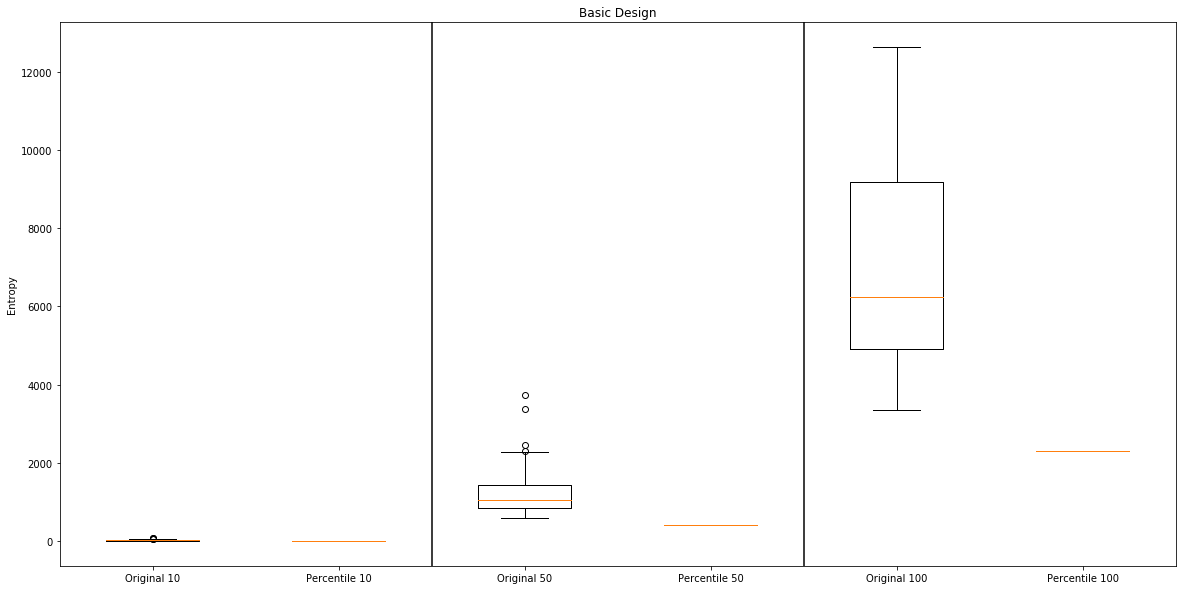

In [9]:
plt.figure(figsize=(20,10))
plt.axvline(x=2.5,color='k')
plt.axvline(x=4.5,color='k')
plt.boxplot(test_result_basic)
plt.ylabel("Entropy")
plt.title("Basic Design")
plt.xticks([1,2,3,4,5,6],["Original 10","Percentile 10","Original 50","Percentile 50","Original 100","Percentile 100"])
plt.show()

# Kaufmann Tree Scanning Method

In [10]:
test1_result_tree = []
test2_result_tree = []
test3_result_tree = []
test4_result_tree = []
test5_result_tree = []
test6_result_tree = []

for i in range(0,100):
    Data_test1=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',10,1)
    Data_test2=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',50,1)
    Data_test3=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',100,1)
    test1=Dia_Methods(Data_test1,2,0,"kaufmann","even","tree")
    test2=Dia_Methods(Data_test1,2,0,"kaufmann","percentile","tree")
    test3=Dia_Methods(Data_test2,2,0,"kaufmann","even","tree")
    test4=Dia_Methods(Data_test2,2,0,"kaufmann","percentile","tree")
    test5=Dia_Methods(Data_test3,2,0,"kaufmann","even","tree")
    test6=Dia_Methods(Data_test3,2,0,"kaufmann","percentile","tree")
    test1_result_tree.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test1))).entropy)
    test2_result_tree.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test2))).entropy)
    test3_result_tree.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test3))).entropy)
    test4_result_tree.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test4))).entropy)
    test5_result_tree.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test5))).entropy)
    test6_result_tree.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test6))).entropy)
    
test_result_tree = [test1_result_tree,test2_result_tree,test3_result_tree,test4_result_tree,test5_result_tree,test6_result_tree]

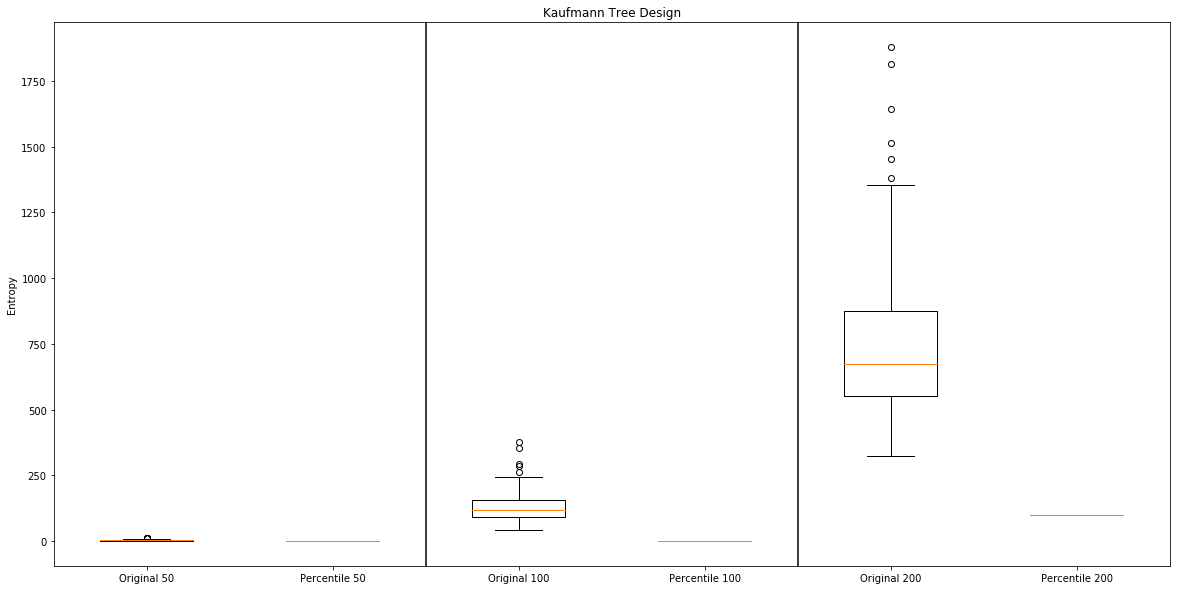

In [11]:
plt.figure(figsize=(20,10))
plt.axvline(x=2.5,color='k')
plt.axvline(x=4.5,color='k')
plt.boxplot(test_result_tree)
plt.ylabel("Entropy")
plt.title("Kaufmann Tree Design")
plt.xticks([1,2,3,4,5,6],["Original 50","Percentile 50","Original 100","Percentile 100","Original 200","Percentile 200"])
plt.show()

# Kaufmann Nested Scanning Method

In [12]:
test1_result_nested = []
test2_result_nested = []
test3_result_nested = []
test4_result_nested = []
test5_result_nested = []
test6_result_nested = []

for i in range(0,100):
    Data_test1=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',10,1)
    Data_test2=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',50,1)
    Data_test3=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',100,1)
    test1=Dia_Methods(Data_test1,2,0,"kaufmann","even","tree")
    test2=Dia_Methods(Data_test1,2,0,"kaufmann","percentile","tree")
    test3=Dia_Methods(Data_test2,2,0,"kaufmann","even","tree")
    test4=Dia_Methods(Data_test2,2,0,"kaufmann","percentile","tree")
    test5=Dia_Methods(Data_test3,2,0,"kaufmann","even","tree")
    test6=Dia_Methods(Data_test3,2,0,"kaufmann","percentile","tree")
    test1_result_nested.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test1))).entropy)
    test2_result_nested.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test2))).entropy)
    test3_result_nested.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test3))).entropy)
    test4_result_nested.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test4))).entropy)
    test5_result_nested.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test5))).entropy)
    test6_result_nested.append(Entropy(Dia_Location_Finder(Scan_Results_Calculator(test6))).entropy)
    
test_result_nested = [test1_result_nested,test2_result_nested,test3_result_nested,test4_result_nested,test5_result_nested,test6_result_nested]

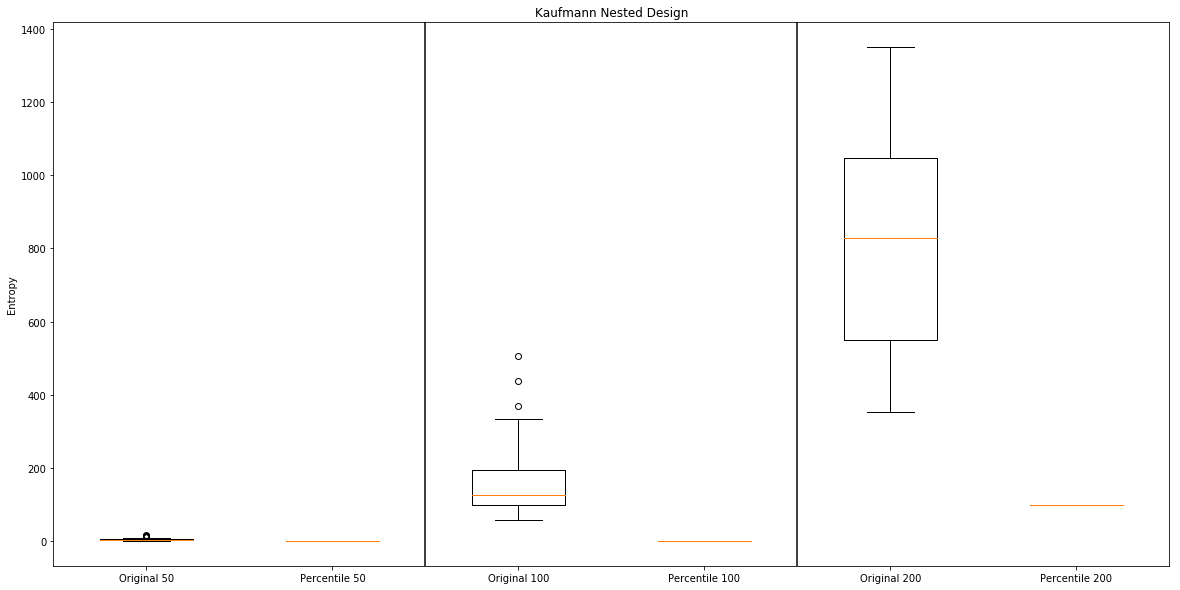

In [13]:
plt.figure(figsize=(20,10))
plt.axvline(x=2.5,color='k')
plt.axvline(x=4.5,color='k')
plt.boxplot(test_result_nested)
plt.ylabel("Entropy")
plt.title("Kaufmann Nested Design")
plt.xticks([1,2,3,4,5,6],["Original 50","Percentile 50","Original 100","Percentile 100","Original 200","Percentile 200"])
plt.show()

# Kaufmann Tree Method Comparisons

[<matplotlib.lines.Line2D object at 0x000001C452158550>, <matplotlib.lines.Line2D object at 0x000001C4521586A0>]

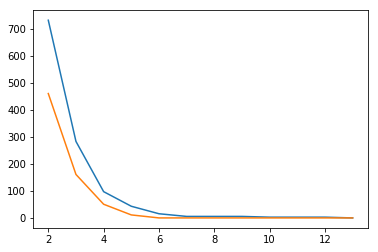

In [8]:
Data_test=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',20,1)
num_extra_bins=7
entropy1 = Entropy_List(Data_test,2,0,"kaufmann","even","tree",extra_bins=num_extra_bins)
entropy2 = Entropy_List(Data_test,2,0,"kaufmann","percentile","tree",extra_bins=num_extra_bins)
plt.plot(range(entropy1.start_subsample_scans,entropy1.end_subsample_scans), entropy1.entropy,range(entropy2.start_subsample_scans,entropy2.end_subsample_scans), entropy2.entropy)

[<matplotlib.lines.Line2D object at 0x000001C452120940>, <matplotlib.lines.Line2D object at 0x000001C452120A90>]

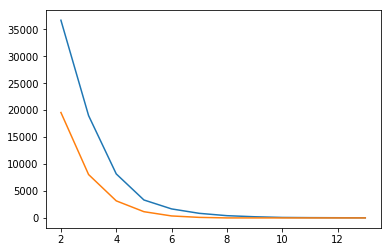

In [9]:
Data_test=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',100,1)
num_extra_bins=7
entropy1 = Entropy_List(Data_test,2,0,"kaufmann","even","tree",extra_bins=num_extra_bins)
entropy2 = Entropy_List(Data_test,2,0,"kaufmann","percentile","tree",extra_bins=num_extra_bins)
plt.plot(range(entropy1.start_subsample_scans,entropy1.end_subsample_scans), entropy1.entropy,range(entropy2.start_subsample_scans,entropy2.end_subsample_scans), entropy2.entropy)

[<matplotlib.lines.Line2D object at 0x000001C454203400>, <matplotlib.lines.Line2D object at 0x000001C454203550>]

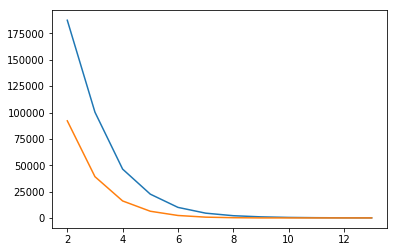

In [10]:
Data_test=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',200,1)
num_extra_bins=7
entropy1 = Entropy_List(Data_test,2,0,"kaufmann","even","tree",extra_bins=num_extra_bins)
entropy2 = Entropy_List(Data_test,2,0,"kaufmann","percentile","tree",extra_bins=num_extra_bins)
plt.plot(range(entropy1.start_subsample_scans,entropy1.end_subsample_scans), entropy1.entropy,range(entropy2.start_subsample_scans,entropy2.end_subsample_scans), entropy2.entropy)

# Multiple MS2 to MS1 observations

In [11]:
Data_test=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p')
num_extra_bins=5

In [12]:
entropy1 = Entropy_List(Data_test,2,0,"kaufmann","even","tree",extra_bins=num_extra_bins)
entropy2 = Entropy_List(Data_test,2,0,"kaufmann","percentile","tree",extra_bins=num_extra_bins)

[<matplotlib.lines.Line2D object at 0x000001C45458A278>, <matplotlib.lines.Line2D object at 0x000001C45458A3C8>]

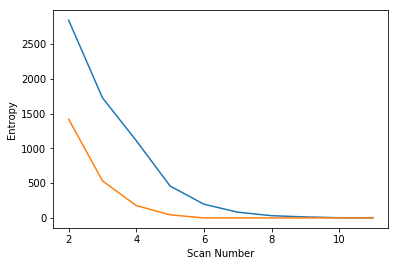

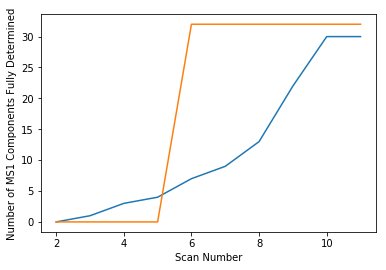

In [14]:
plt.figure(0)
plt.xlabel('Scan Number')
plt.ylabel('Entropy')
plt.plot(range(entropy1.start_subsample_scans,entropy1.end_subsample_scans), entropy1.entropy,range(entropy2.start_subsample_scans,entropy2.end_subsample_scans), entropy2.entropy)
plt.figure(1)
plt.xlabel('Scan Number')
plt.ylabel('Number of MS1 Components Fully Determined')
plt.plot(range(entropy1.start_subsample_scans,entropy1.end_subsample_scans), entropy1.components_determined,range(entropy2.start_subsample_scans,entropy2.end_subsample_scans), entropy2.components_determined)

In [15]:
Data_test=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p')
num_extra_bins=5

In [16]:
entropy1 = Entropy_List(Data_test,2,0,"kaufmann","even","nested",extra_bins=num_extra_bins)
entropy2 = Entropy_List(Data_test,2,0,"kaufmann","percentile","nested",extra_bins=num_extra_bins)

[<matplotlib.lines.Line2D object at 0x000001C45461B390>, <matplotlib.lines.Line2D object at 0x000001C45461B4E0>]

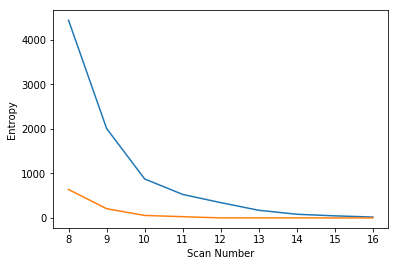

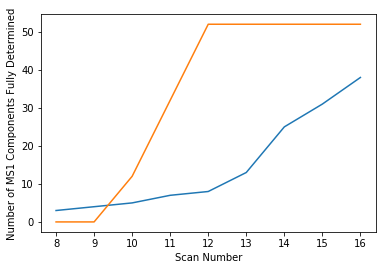

In [17]:
plt.figure(0)
plt.xlabel('Scan Number')
plt.ylabel('Entropy')
plt.plot(range(entropy1.start_subsample_scans,entropy1.end_subsample_scans), entropy1.entropy,range(entropy2.start_subsample_scans,entropy2.end_subsample_scans), entropy2.entropy)
plt.figure(1)
plt.xlabel('Scan Number')
plt.ylabel('Number of MS1 Components Fully Determined')
plt.plot(range(entropy1.start_subsample_scans,entropy1.end_subsample_scans), entropy1.components_determined,range(entropy2.start_subsample_scans,entropy2.end_subsample_scans), entropy2.components_determined)

# Allow for Variability in MS2 m/z Observed Values

In [19]:
Data_test=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p')
num_extra_bins=5

In [20]:
entropy1 = Entropy_List(Data_test,2,0,"kaufmann","even","nested",extra_bins=num_extra_bins)

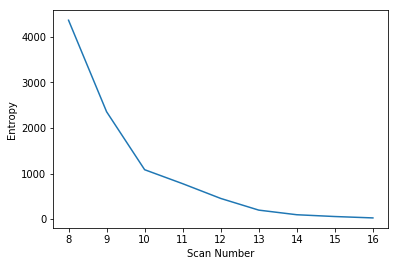

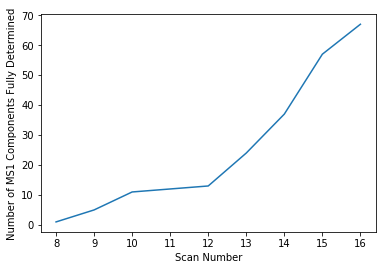

In [21]:
plt.figure(0)
plt.xlabel('Scan Number')
plt.ylabel('Entropy')
plt.plot(range(entropy1.start_subsample_scans,entropy1.end_subsample_scans), entropy1.entropy)
plt.figure(1)
plt.xlabel('Scan Number')
plt.ylabel('Number of MS1 Components Fully Determined')
plt.plot(range(entropy1.start_subsample_scans,entropy1.end_subsample_scans), entropy1.components_determined)

In [26]:
dia = Dia_Methods(Data_test,2,0,"kaufmann","even","nested",extra_bins=num_extra_bins)
scan_results = Scan_Results_Calculator(dia,ms2_mz_slack=0.000001,ms2_intensity_slack=0.000001)
scan_results.ms2_mz

[[97.91062222543931, 97.91062222543931, 97.91062222543931, 97.91062222543931, 97.91062222543931, 97.91062222543931], [80.1622488018048, 80.1622488018048, 80.1622488018048, 80.1622488018048, 80.1622488018048, 80.1622488018048], [58.04543542328285, 58.04543542328285, 58.04543542328285, 58.04543542328285, 58.04543542328285, 58.04543542328285], [112.67777744729489, 112.67777744729489, 112.67777744729489, 112.67777744729489, 112.67777744729489, 112.67777744729489], [110.09127293272233, 110.09127293272233, 110.09127293272233, 110.09127293272233, 110.09127293272233, 110.09127293272233], [73.23220832447221, 73.23220832447221, 73.23220832447221, 73.23220832447221, 73.23220832447221, 73.23220832447221], [96.67439338158692, 96.67439338158692, 96.67439338158692, 96.67439338158692, 96.67439338158692, 96.67439338158692], [69.80840413136391, 69.80840413136391, 69.80840413136391, 69.80840413136391, 69.80840413136391, 69.80840413136391], [142.20284349488773, 142.20284349488773, 142.20284349488773, 142.

# Create Noisy_Peak Class and Test

In [23]:
Data_test=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',1,1,ms2_mz_noise_sd=1,ms2_intensity_noise_sd=1)

In [28]:
# True ms2 mz Value
Data_test.peaks[1].mz

216.9627668752336

In [29]:
# Sampled ms2 mz Values
for i in range(0,10):
    print(Data_test.peaks[1].get(2,0,[(0,2000)])[0][0])

218.5105329443422
217.24764418871854
217.58335938713597
217.82849532672955
217.78242636610958
218.63789349956312
216.8056161686389
217.82759140024694
217.36614831843215
218.0649665715029


In [30]:
# True ms2 intensity Value
Data_test.peaks[1].intensity

62598.847580963215

In [31]:
# Sampled ms2 mz Values
for i in range(0,10):
    print(Data_test.peaks[1].get(2,0,[(0,2000)])[1][0])

62600.00125333077
62598.033416904
62599.57786365397
62598.696708629526
62599.603849982006
62598.10476008828
62599.52254695171
62598.27418774966
62597.691123675235
62598.04654303723


Next few lines won't work yet, even if Jupyter makes it look like they do

In [135]:
Data_test=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',10,1,ms2_noise_sd=0.01)
num_extra_bins=3
test=Dia_Kaufmann(Data_test,64,"percentile","tree",extra_bins=num_extra_bins)

In [136]:
ent = test.entropy(2)

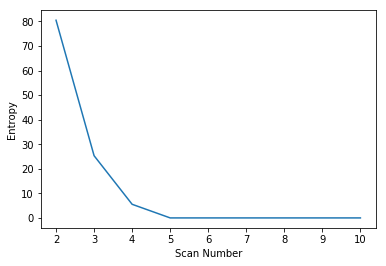

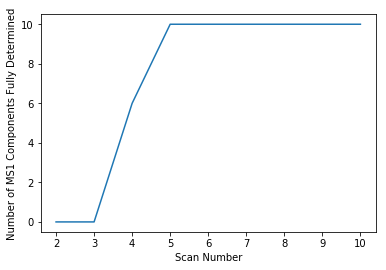

In [137]:
plt.figure(0)
plt.xlabel('Scan Number')
plt.ylabel('Entropy')
plt.plot(range(2,8+num_extra_bins), ent[0][2:],color='C0')

plt.figure(1)
plt.xlabel('Scan Number')
plt.ylabel('Number of MS1 Components Fully Determined')
plt.plot(range(2,8+num_extra_bins), ent[1][2:],color='C0')

In [140]:
test.mz_options[1]

array([106.16987176, 106.16362335, 106.15960807, 106.16116294])

# Create Datasets where MS1s can have the same MS2 Fragments

In [25]:
Data_test=Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p')

In [26]:
for i in range(0,len(Data_test.peaks)):
    if Data_test.peaks[i].ms_level==2:
        print(Data_test.peaks[i])
    if  Data_test.peaks[i].ms_level==1:
        print( ) 


Peak mz=81.7767 rt=593.51 intensity=3475.62 ms_level=2
Peak mz=80.5875 rt=345.80 intensity=5096.23 ms_level=2
Peak mz=223.1059 rt=1354.10 intensity=90700.14 ms_level=2

Peak mz=83.4366 rt=427.22 intensity=9776.10 ms_level=2
Peak mz=116.6014 rt=1347.71 intensity=57072.34 ms_level=2
Peak mz=92.3304 rt=284.24 intensity=52745.79 ms_level=2

Peak mz=55.9972 rt=340.08 intensity=7132.11 ms_level=2
Peak mz=251.5132 rt=827.41 intensity=223099.13 ms_level=2
Peak mz=83.2090 rt=799.64 intensity=287850.26 ms_level=2
Peak mz=99.2574 rt=419.36 intensity=80669.56 ms_level=2
Peak mz=176.1123 rt=412.89 intensity=27020.67 ms_level=2
Peak mz=53.2442 rt=887.23 intensity=37645.03 ms_level=2
Peak mz=70.2688 rt=483.84 intensity=36888.77 ms_level=2
Peak mz=59.8045 rt=761.12 intensity=5832.40 ms_level=2
Peak mz=182.7092 rt=1058.06 intensity=64809.38 ms_level=2
Peak mz=81.7142 rt=343.71 intensity=22226.23 ms_level=2
Peak mz=196.6658 rt=967.94 intensity=6718.76 ms_level=2
Peak mz=156.9393 rt=615.06 intensity=533

# Testing

In [27]:
m = Sample_Dataset('../../../beer_data/peak_sampler_4_beers.p',ms2_mz_noise_sd=0,ms2_intensity_noise_sd=0)

In [28]:
DIA = Dia_Methods(m,2,0,"kaufmann","percentile","tree")

In [29]:
scan_results = Scan_Results_Calculator(DIA)
d = Dia_Location_Finder(scan_results)
e = Entropy(d)
print(e.entropy)
print(e.components_determined)
print(e.components)

0.0
54
54


Potentially add a wrapper to convert a DIA_results to a subsection of the DIA results -  to allow easy entropy plot calculations

add some measure of accuracy. At some point if we increase error enough we will get things wrong

# To Do List

To do list
    - Quatification of Error Introduced by Noise
        - Needs stress testing with large noise value
        - probably needs fixing so it works
    - Reorganise methods
    - Speed up methods so can be used in real time more easily